## Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

Penguins and health exp tips
       
    


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import numpy as np
from IPython.display import display
from ipywidgets import interact_manual

# Anatomy of a visualization
https://carbondesignsystem.com/data-visualization/chart-anatomy/ 

Canvas / Plot Area - The area where the data is visualized.

Axis - The x and y lines that help to orient the viewer to the data.

Title - A brief description of the data being visualized.

Series / Trace - A single set of data that is plotted on the chart.

Legend - A key that explains the colors or symbols used in the visualization / series.

# Data Plotting: Kinds of Data

- Categorical data - Discrete values like Yes/No, Red/Green/Blue, etc.
- Ordinal data - Categorical data that has an order to it. Monday, Tuesday, Wednesday, etc.
- Time series data - Data that is recorded over time. Stock prices, temperature, etc.
- Continuous data - Measuments, such as weight, height, price, etc.
- Discrete data - Data that can only take certain values. Number of children, number of cars, etc.
- Geospatial data - Data that is tied to a location. Latitude, Longitude, etc.

## Let's load up some sample datasets:

- "penguins" The Palmer Penguins dataset: https://github.com/allisonhorst/palmerpenguins
- "tips" One waiter collected 244 data points about his tipping customers. https://rdrr.io/cran/reshape2/man/tips.html
- "healthexp" Life expectancy -vs- heath care expenditure. https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure

these are stored in Pandas dataframes. `pengo`, `health` and `tips` respectively.

In [2]:
pengo = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
health = sns.load_dataset("healthexp")
# add counts
pengo['count'] = 1
tips['count'] = 1

In [3]:
pengo.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
179,Chinstrap,Dream,49.5,19.0,200.0,3800.0,Male,1
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,Female,1
168,Chinstrap,Dream,50.3,20.0,197.0,3300.0,Male,1
80,Adelie,Torgersen,34.6,17.2,189.0,3200.0,Female,1
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male,1


In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,count
147,11.87,1.63,Female,No,Thur,Lunch,2,1
177,14.48,2.00,Male,Yes,Sun,Dinner,2,1
206,26.59,3.41,Male,Yes,Sat,Dinner,3,1
55,19.49,3.51,Male,No,Sun,Dinner,2,1
79,17.29,2.71,Male,No,Thur,Lunch,2,1


In [5]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
250,2017,Canada,5150.470,81.9
36,1979,USA,908.963,73.9
136,1998,Canada,2200.468,78.6
112,1994,Canada,1962.196,77.9
61,1984,Japan,745.981,77.4


## Bar Plots: Counts

This code displays the number of penguins by species. Which species is most represented in the data set?

<Axes: title={'center': 'Penguin species count'}, xlabel='species', ylabel='count'>

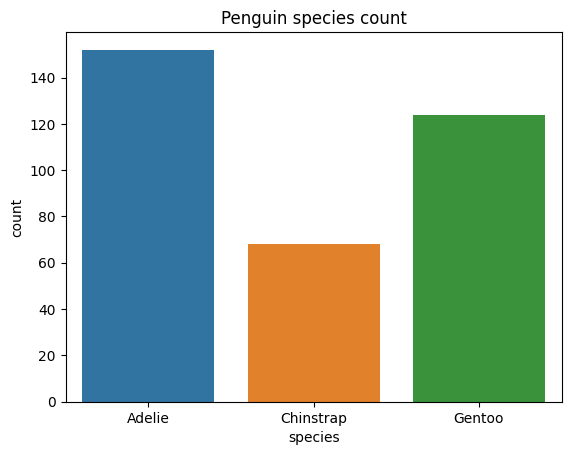

In [11]:
pengo = sns.load_dataset("penguins")
pengo['count'] = 1
plot = sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")
plot.set_title("Penguin species count")
plot

<Axes: xlabel='sex', ylabel='count'>

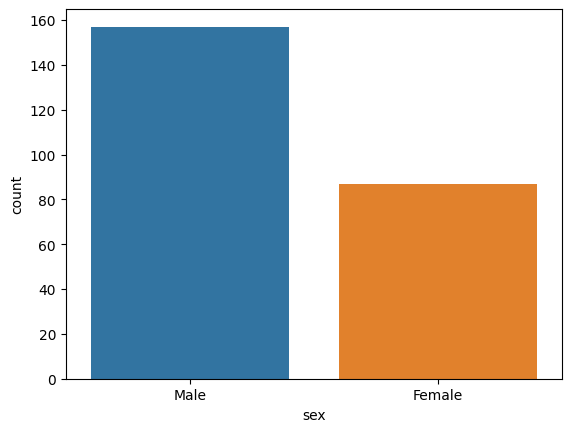

In [10]:
# PROMPT 1
# Are there more males or females in the tips dataset?
sns.barplot(data=tips, x='sex', y='count', hue='sex', estimator='sum')

<Axes: xlabel='smoker', ylabel='count'>

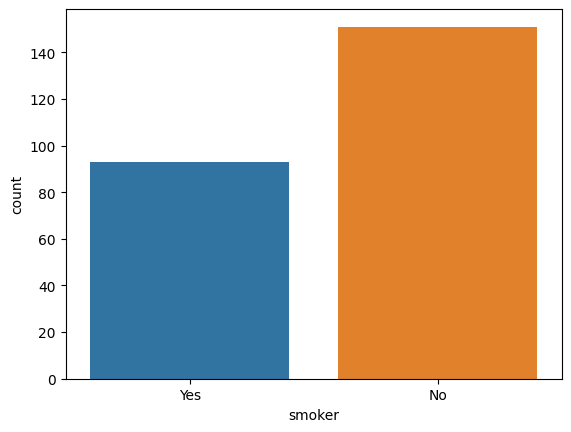

In [8]:
# PROMPT 2
# Are there more smokers or non-smokers in the tips dataset?
sns.barplot(data=tips, x='smoker', y='count', hue='smoker', estimator='sum')

## Bar Plots: Averages

This code displays the average penguin mass by species. The default `estimator='mean'`

<Axes: xlabel='species', ylabel='body_mass_g'>

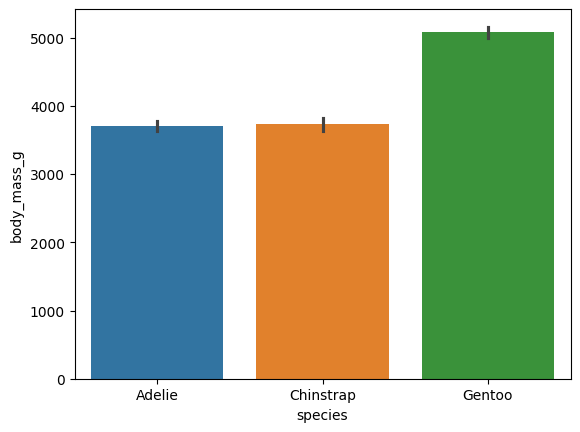

In [17]:
sns.barplot(data=pengo, x="species", y="body_mass_g", hue="species")

<Axes: xlabel='sex', ylabel='tip'>

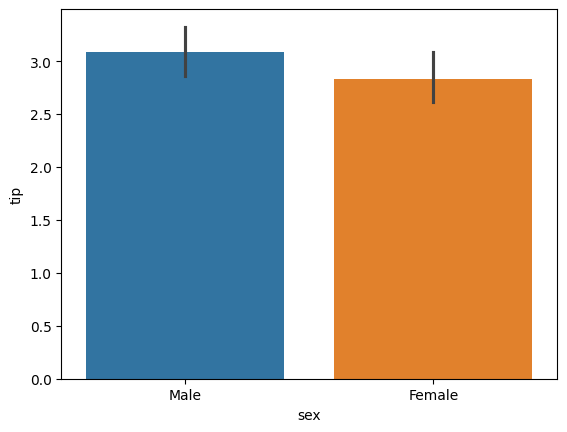

In [18]:
# PROMPT 3
# What is the average tip by gender?
sns.barplot(data=tips, x='sex', y='tip', hue='sex')

<Axes: xlabel='smoker', ylabel='tip'>

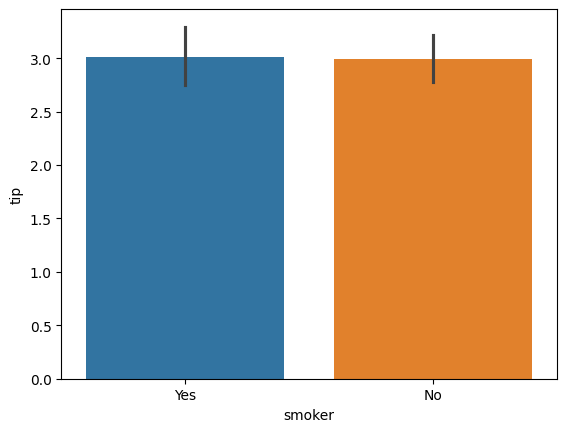

In [19]:
# PROMPT 4
# Who tips more smokers or non-smokers?
sns.barplot(data=tips, x='smoker', y='tip', hue='smoker')

## Adding a Series to a bar plot

This code breaks down the penguin species mass by island. Which island has the most penguins? which species is dominant on each island?

<Axes: xlabel='species', ylabel='count'>

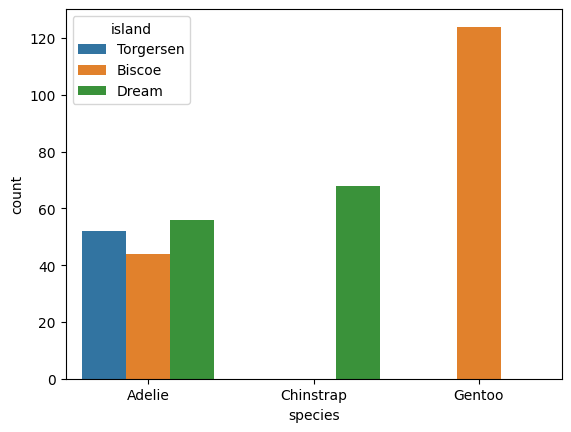

In [20]:
sns.barplot(data=pengo, x="species", y="count", hue="island", estimator="sum")

<Axes: xlabel='sex', ylabel='count'>

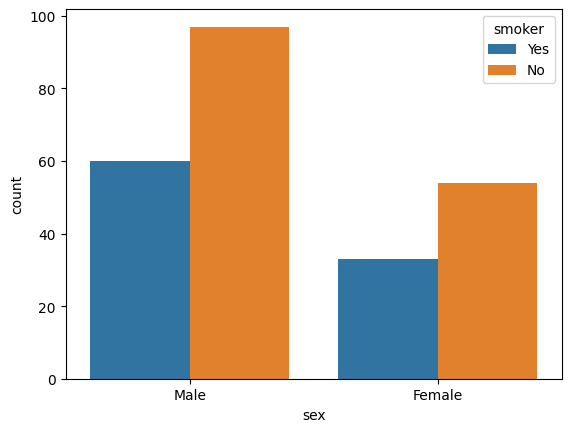

In [21]:
# PROMPT 5
# get a count of tips by sex and smoker
sns.barplot(data=tips, x='sex', y='count', hue='smoker', estimator='sum')

In [22]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,count
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1


<Axes: xlabel='time', ylabel='count'>

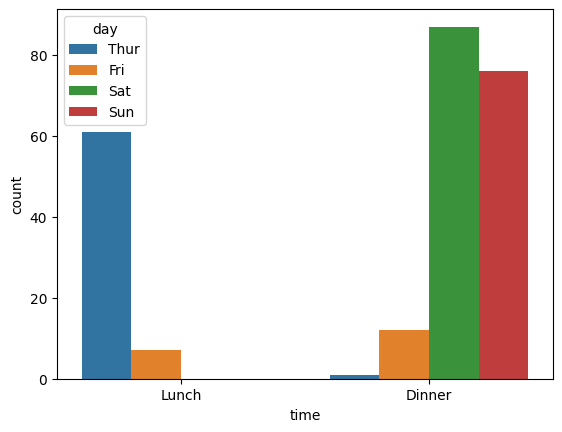

In [17]:
# PROMPT 6
# get a count of tips by day and time. Explain why the data appears as it does!
sns.barplot(data=tips, x='time', y='count', hue='day', estimator='sum')

In [12]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
243,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,Male,1


In [22]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
181,23.33,5.65,Male,Yes,Sun,Dinner,2,1


## Scatter plots

What is the relationship between flipper length and bill length by species!

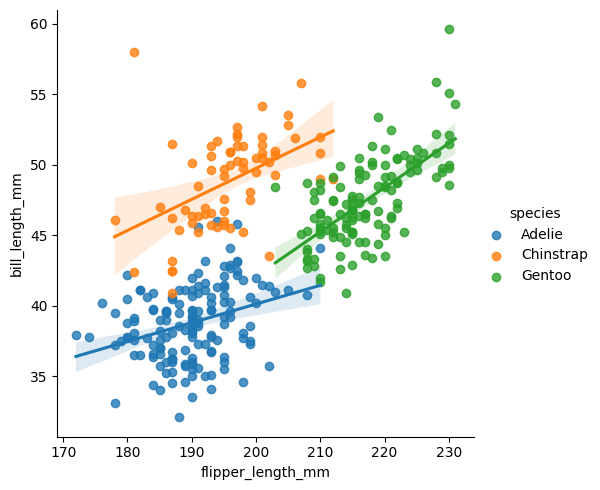

In [15]:
sns.lmplot(data=pengo, x="flipper_length_mm", y="bill_length_mm", hue="species")

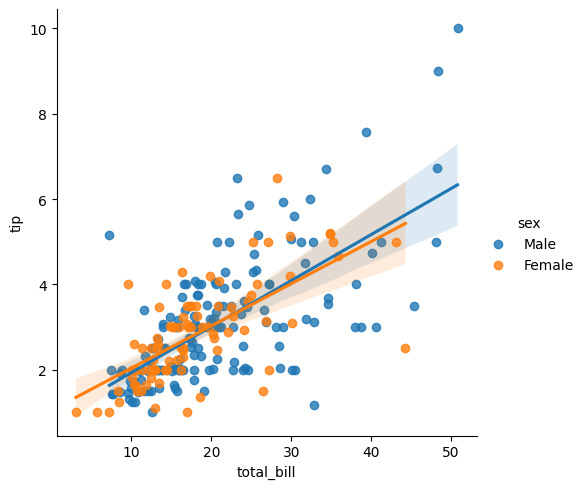

In [23]:
# PROMPT 7
# Show the relationship between bill and tip by gender
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

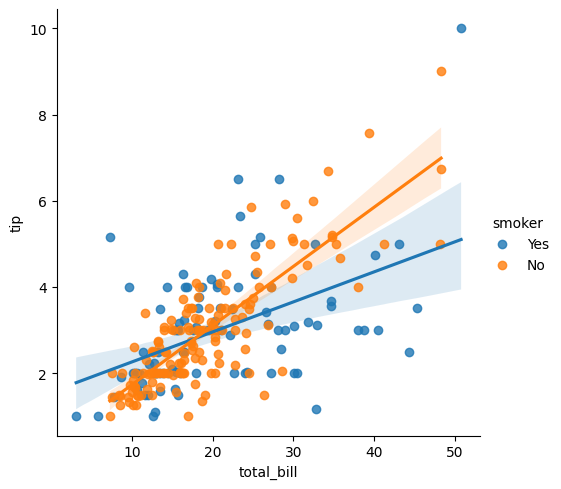

In [24]:
# PROMPT 8
# Show the relationship between bill and tip by smoker
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')

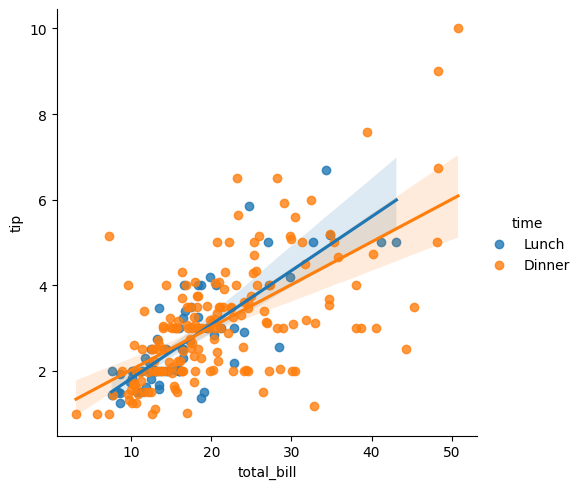

In [25]:
# PROMPT 9
# Show the relationship between bill and tip by lunch/dinner
sns.lmplot(data=tips, x='total_bill', y='tip', hue='time')

In [13]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,Male,1


In [14]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
192,28.44,2.56,Male,Yes,Thur,Lunch,2,1


## Interact Example

This example allows the user to select two variables to compare from the following:

`['bill_length_mm;', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`

it will then compare them using an `lmplot()` for each species. 


In [23]:
choices = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
@interact_manual(x=choices, y=choices)
def onclick(x,y):
    sns.lmplot(data=pengo, x=x, y=y, hue="species")

interactive(children=(Dropdown(description='x', options=('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm…

### Prompt 10: Interact for tips

Among the following 4 Series:  

`['sex', 'smoker', 'day', 'time']`

Plot a bar of average tip `size`, allowing the user to choose which of the 4 series appears on the horizontal axis, and the other as part of the legend. Do not show the error bars


In [16]:
# PROMPT 10
choices = ['sex', 'smoker', 'day', 'time']
@interact_manual(x=choices, hue=choices)
def onclick(x,hue):
    sns.barplot(data=tips, x=x, y='size', hue=hue, errorbar=None)

interactive(children=(Dropdown(description='x', options=('sex', 'smoker', 'day', 'time'), value='sex'), Dropdo…

## Timeseries Line Plots

Let's take another look at the `health` dataset. The last few challenges will use this dataset. Since it has a `Year` Series, it is suitable for line plots. 

In [24]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
42,1980,USA,1036.300,73.7
191,2007,Germany,3750.787,80.1
99,1991,USA,2901.589,75.5
25,1976,Japan,303.725,74.8
43,1981,Canada,898.807,75.5


<Axes: xlabel='Year', ylabel='Life_Expectancy'>

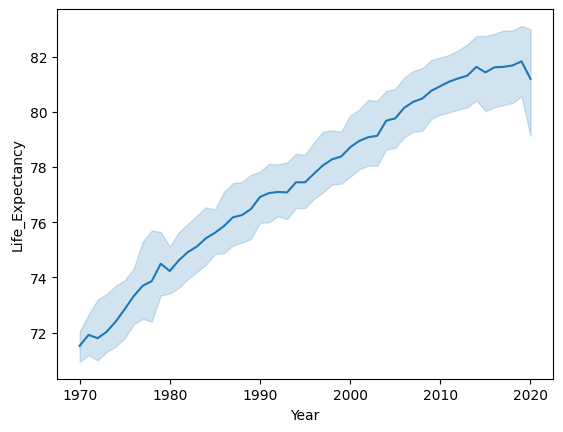

In [18]:
# PROMPT 11
# Plot average life expectancy for all countries by year
sns.lineplot(data=health, x="Year", y="Life_Expectancy", estimator="mean")

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

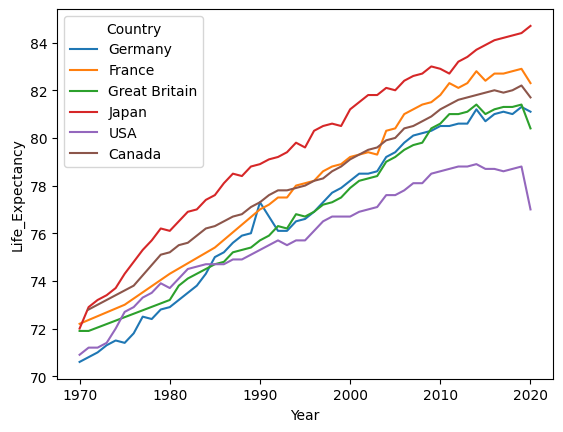

In [45]:
# PROMPT 12
# # Plot average life expectancy by year, broken our for each country as a legend
sns.lineplot(data=health, x="Year", y="Life_Expectancy", hue="Country", estimator="mean")

## Final Plot

Figure out the best way to plot this:

Compare life expectancy to Spending. Show each country in the legend

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

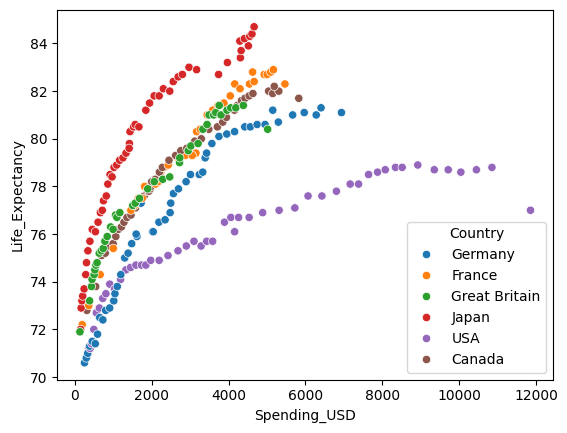

In [46]:
# PROMPT 13
sns.scatterplot(data=health, x="Spending_USD", y="Life_Expectancy", hue="Country")